In [1]:
import pandas as pd
import numpy as np

# Hela ML libraries 
from hela import hmm
import hela.generation.hmm as hmm_gen

# Viz libraries
import altair as alt
import hela.visualization.hmm as hmmplot 
import matplotlib.pyplot as plt
from hela.visualization.hmm import TU_COLORS
%matplotlib inline

# Utility Libraries
from datetime import datetime
from dask.distributed import Client
from scipy.special import logsumexp
from scipy import stats
import itertools

# Generate fHMM Data

In [2]:
gen = hmm_gen.FactoredHMMGenerativeModel(
                                     ns_hidden_states =[2,2],
                                     n_gaussian_features =2,
                                     n_categorical_features = 2)

factored_hidden_states = gen.generate_hidden_state_sequence(n_observations = 500)
factored_hidden_states.head()

,0,1
2020-08-01,0,0
2020-08-02,0,0
2020-08-03,0,0
2020-08-04,0,0
2020-08-05,0,0


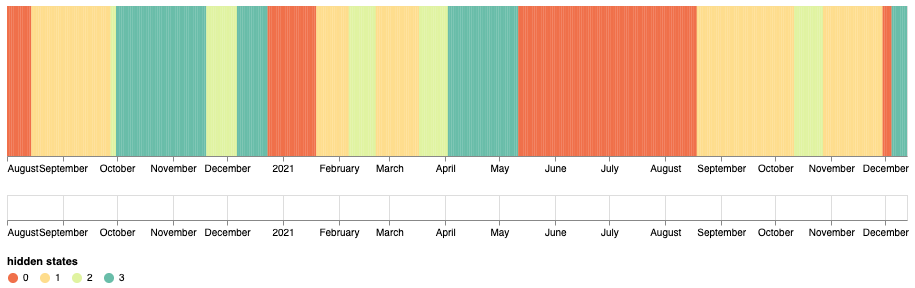

In [3]:
flattened_hidden_states = gen.flatten_hidden_state_sequence(factored_hidden_states)
hmmplot.draw_states(flattened_hidden_states, hide_brush=False)

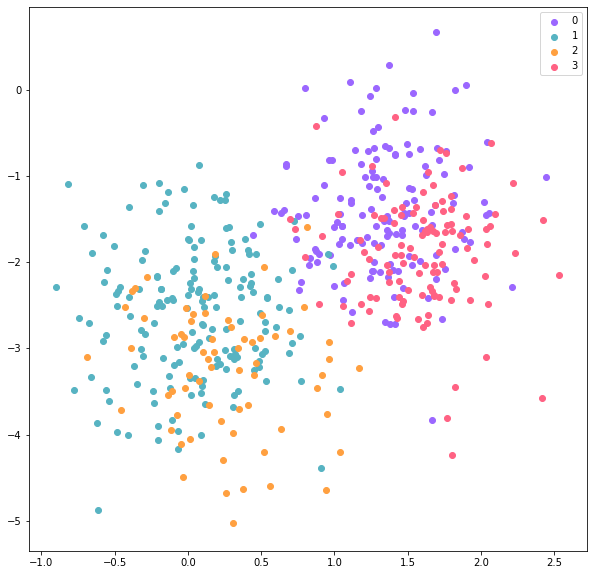

In [4]:
data = gen.generate_observations(factored_hidden_states)

plt.figure(figsize = (10,10))
feat = gen.gaussian_values.columns
for i in range(np.prod(gen.ns_hidden_states)):
    idx = np.where(flattened_hidden_states == i)
    df = np.array(data.loc[data.index[idx],feat])
    plt.scatter([d[0] for d in df],[d[1] for d in df], color = TU_COLORS[i],label = i)

plt.legend()
plt.show()

# Load fHMM Model Object

In [ ]:
fhmm_training_spec = gen.data_to_fhmm_training_spec(factored_hidden_states, 
                                   gen.ns_hidden_states, 
                                   data,
                                   categorical_features = list(gen.categorical_values.columns), 
                                   gaussian_features = list(gen.gaussian_values.columns))

fhmm_config = hmm.FactoredHMMConfiguration.from_spec(fhmm_training_spec)
model = fhmm_config.to_model()

In [6]:
fhmm_training_spec

{'hidden_state': {'type': 'finite', 'count': [2, 2]},
 'n_systems': 2,
 'observations': [{'name': 'categorical_feature_0',
   'type': 'finite',
   'values': [0, 1]},
  {'name': 'categorical_feature_1', 'type': 'finite', 'values': [0, 1, 2]},
  {'name': 'gaussian_feature_0',
   'type': 'continuous',
   'dist': 'gaussian',
   'dims': 1},
  {'name': 'gaussian_feature_1',
   'type': 'continuous',
   'dist': 'gaussian',
   'dims': 1}],
 'model_parameter_constraints': {'transition_constraints': masked_array(
    data=[[[0.9845559845559846, 0.015444015444015444],
           [0.016666666666666666, 0.9833333333333333]],
  
          [[0.9842767295597484, 0.015723270440251572],
           [0.022099447513812154, 0.9779005524861878]]],
    mask=[[[False, False],
           [False, False]],
  
          [[False, False],
           [False, False]]],
    fill_value=1e+20), 'initial_state_constraints': masked_array(
    data=[[1.0, 0.0],
          [1.0, 0.0]],
    mask=[[False, False],
          [Fals

In [9]:
inf = model.to_inference_interface(data)

In [ ]:
gibbs_states = inf.gibbs_sample(data, iterations = 100, hidden_state_vector_df = None)

In [ ]:
flattened_gibbs_states = gen.flatten_hidden_state_sequence(gibbs_states)
hmmplot.draw_states(flattened_gibbs_states, hide_brush=False)

In [ ]:
plt.figure(figsize = (10,10))
feat = gen.gaussian_values.columns
for i in range(np.prod(gen.ns_hidden_states)):
    idx = np.where(flattened_gibbs_states == i)
    df = np.array(data.loc[data.index[idx],feat])
    plt.scatter([d[0] for d in df],[d[1] for d in df], color = TU_COLORS[i], label = i)

plt.legend()
plt.show()